In [4]:
from IPython.display import clear_output
from modules.plotter import print_result
from modules.golomb_simple import init_simple_problem

UDP = init_simple_problem()
real_bound = [(-1, 1) for _ in range(15)]+[(-10, 10) for _ in range(15)]

## Differencial Evolution

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

## SciPy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

In [7]:
from scipy.optimize import differential_evolution

### Stock

solution:  [ 0.21835217  0.23871056 -0.15075573 -0.14028291  0.31866852  0.37683394
 -0.44675452 -0.13210342  0.39638516 -0.2246715  -0.26405223  0.90722464
  0.04953683 -0.57679698 -0.0056112   0.67552777 -0.43225444 -0.57068775
  0.35372599  0.13804172  0.52656453  0.60641216 -0.42496929 -0.42135787
  0.88372974 -0.32379556 -0.08543933 -0.34592125 -0.84666001  0.37141473]
wrost Fill factor: -0.14286  ,	 wrost Empty factor(?) : 0.85714
XY


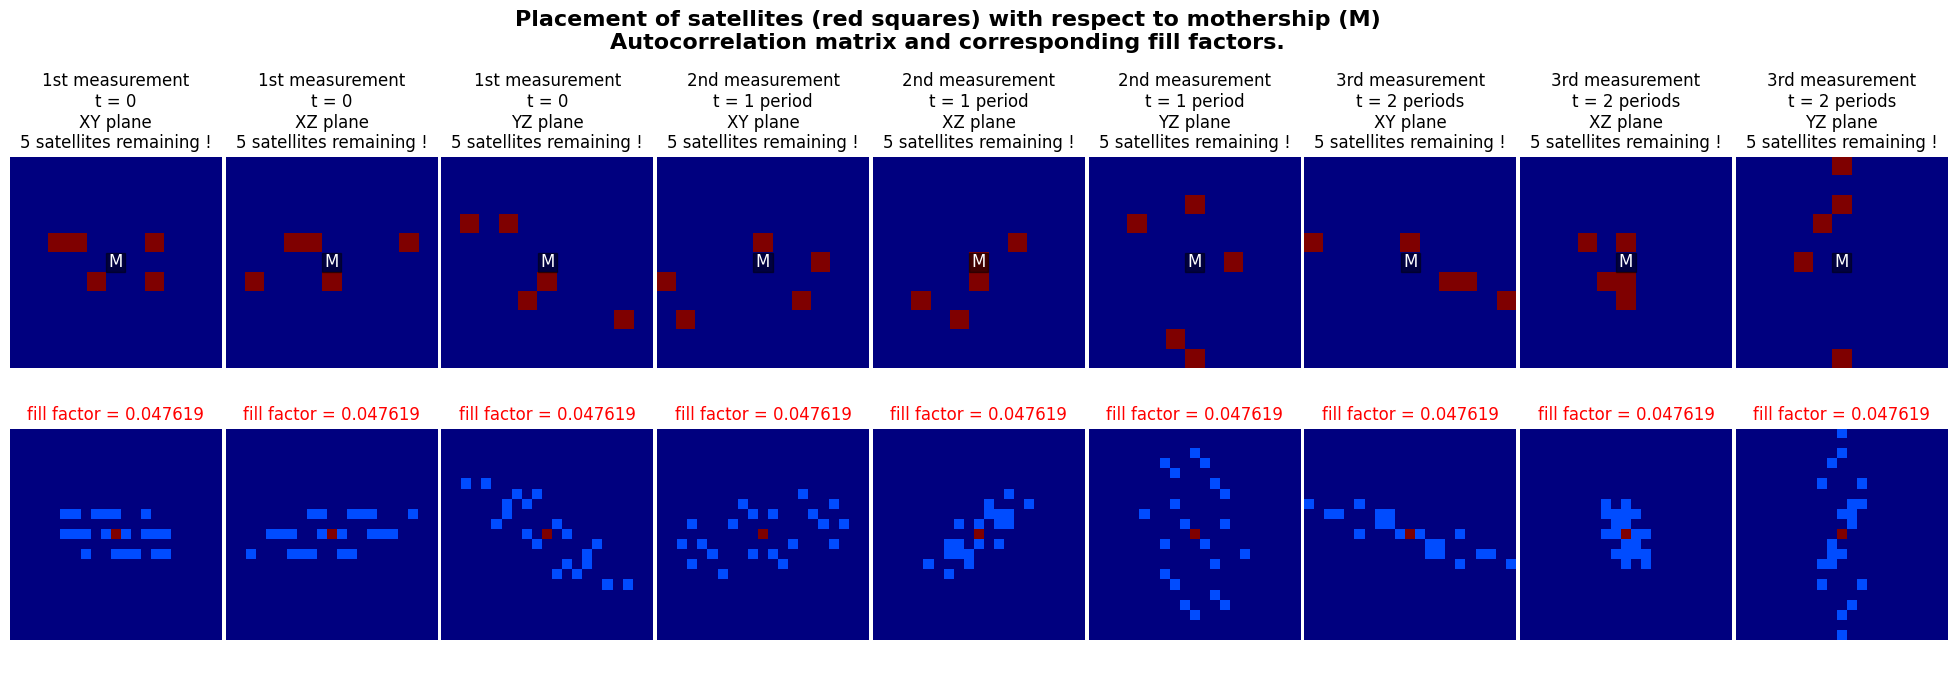

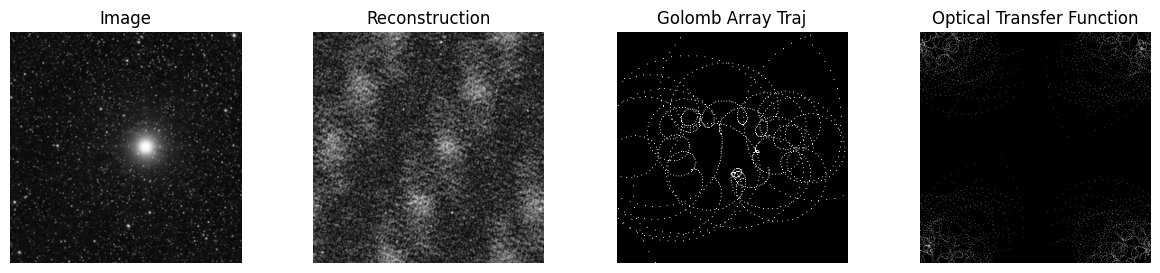

XZ


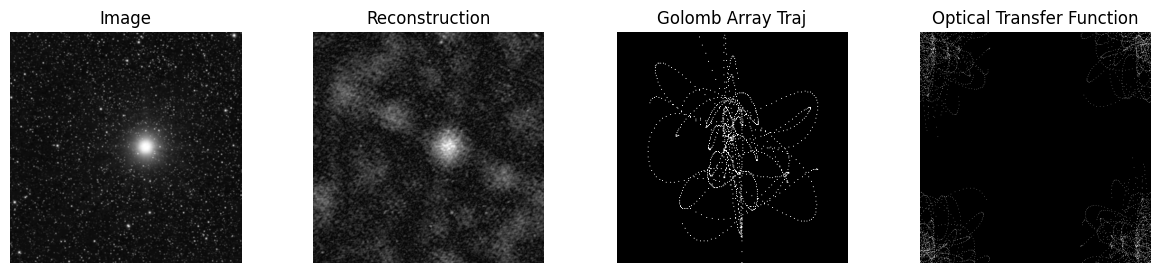

YZ


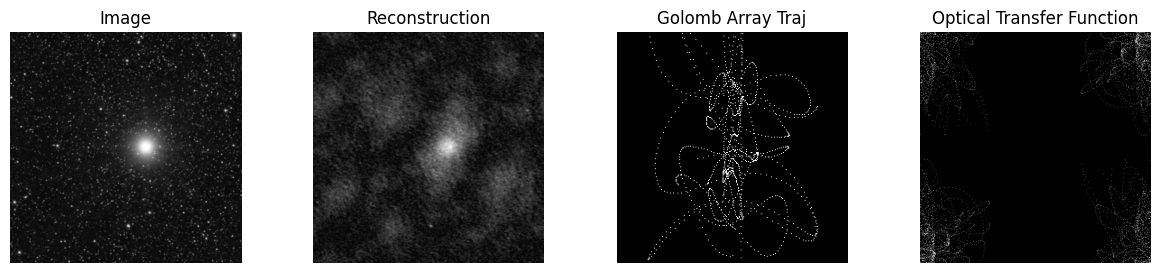

In [ ]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness(solution)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

### Force Golomb Optimal

solution:  [-0.17977784 -0.31225357  0.21155072  0.36412771  0.30257112  0.60519246
  0.74401373 -0.23931161 -0.30341971 -0.6622432  -0.10624739  0.32633519
 -0.44973495  0.79977043 -0.97344154  0.7041242   0.77140144  0.47316705
  0.26118292 -0.61938147 -0.44548784 -0.80971801  0.49815156  0.9627978
  0.79535683 -0.12627692 -0.37341604  0.18079299 -0.31225491 -0.59870778]
worst Fill factor: -0.14286  ,	 worst Empty factor(?) : 0.85714


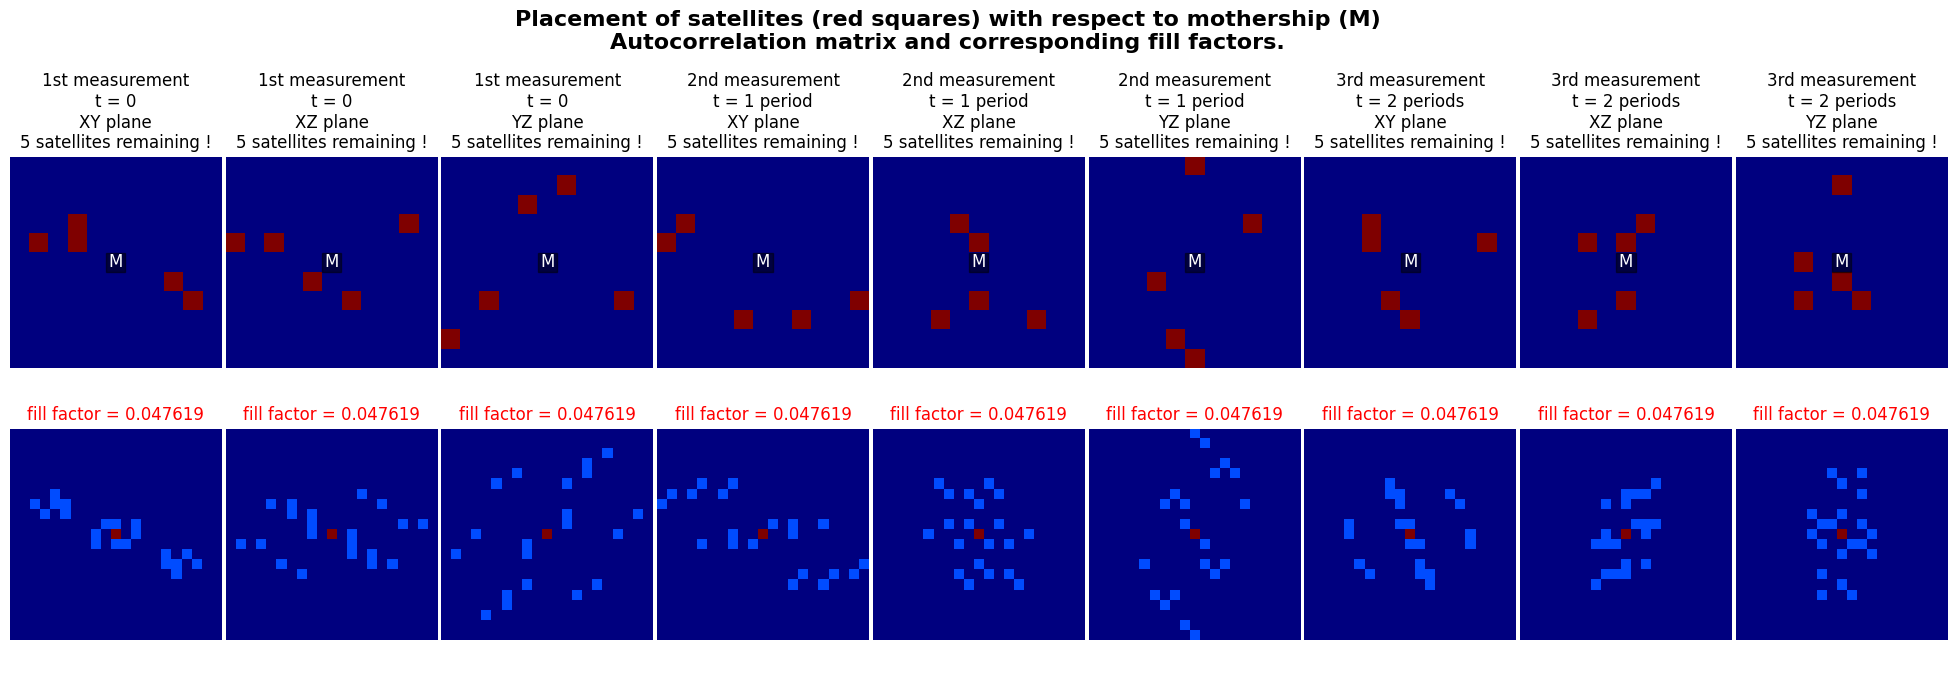

XY


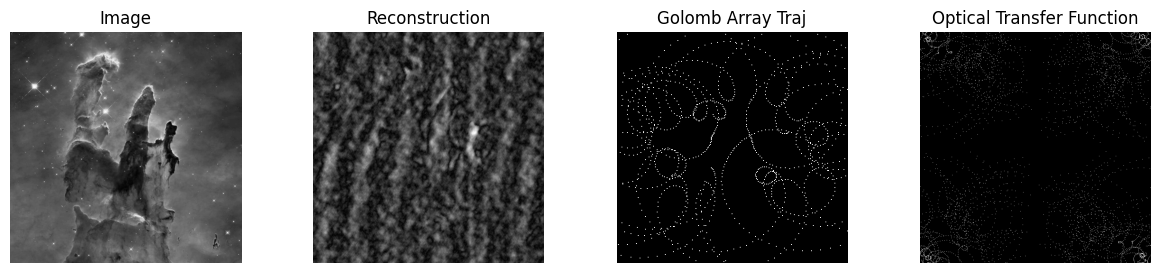

XZ


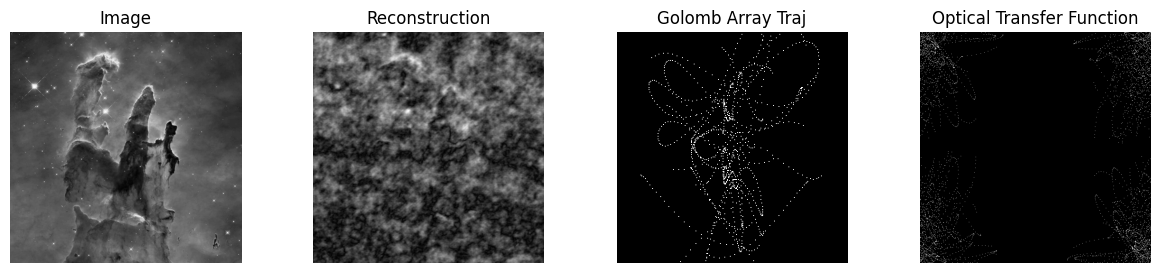

YZ


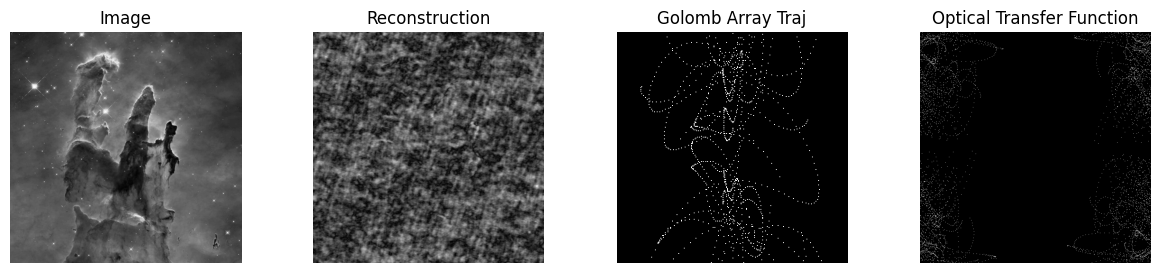

In [8]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, reduce_fill_if_not_optimal=True)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

### Force satellites in a smaller square

solution:  [-0.05577075 -0.16458541 -0.22873266  0.0752046  -0.3692047  -0.26051647
  0.18718517 -0.26151128 -0.03490717  0.69433743 -0.78080358  0.26845586
 -0.1791718   0.92204855  0.22350194 -0.59906654 -0.25483752 -0.07853034
  0.08225505  0.44906001 -0.15341968 -0.39372594 -0.5330857   0.14989724
 -0.92735696 -0.1620523  -0.3952615  -0.50300544  0.15157438  0.46413071]
worst Fill factor: -0.14286  ,	 worst Empty factor(?) : 0.85714


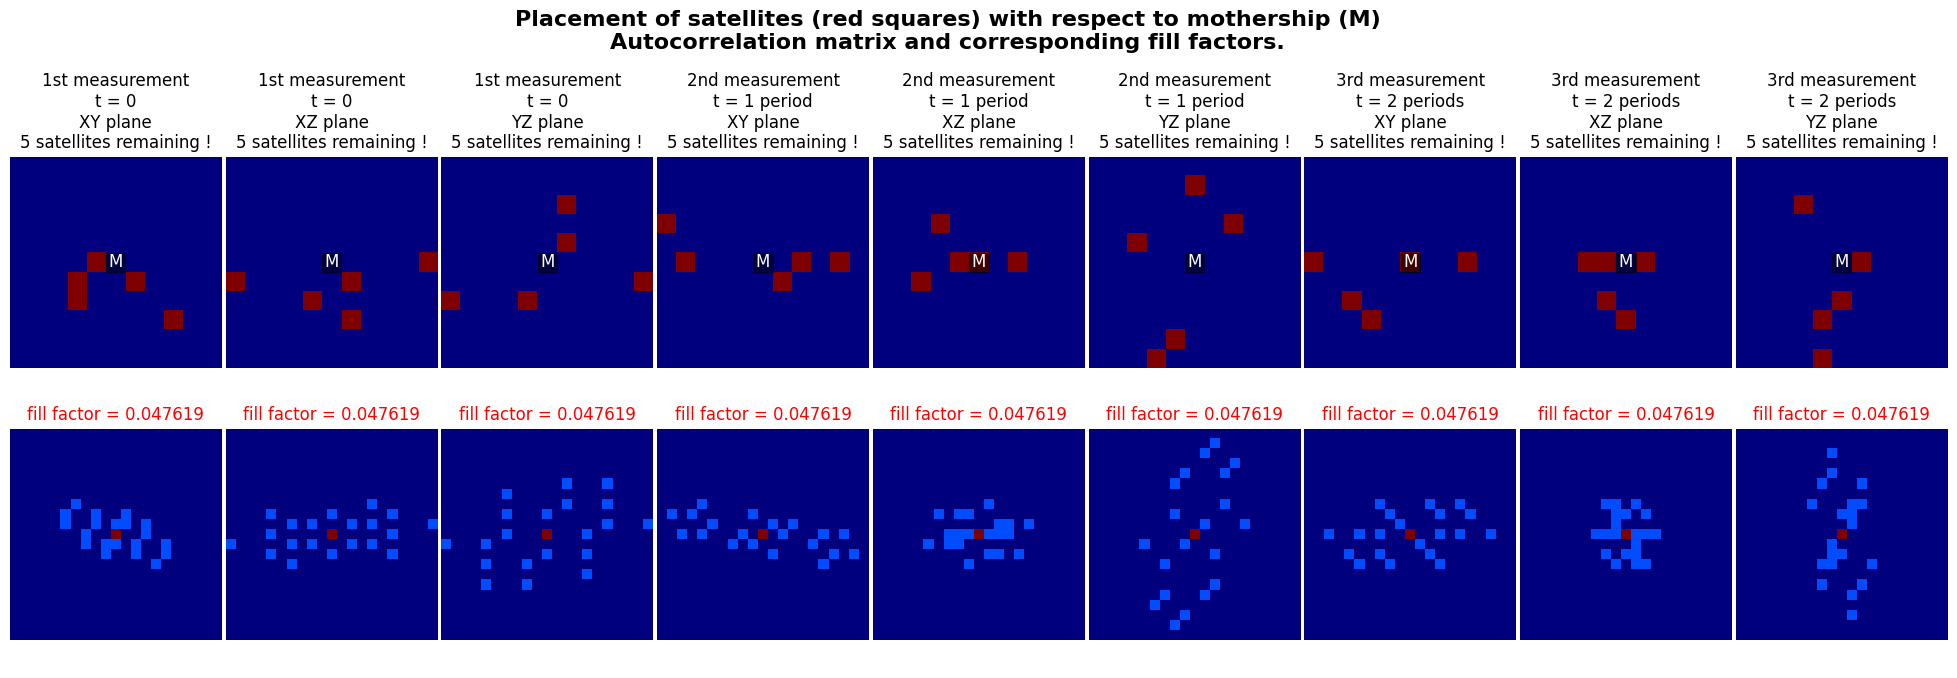

XY


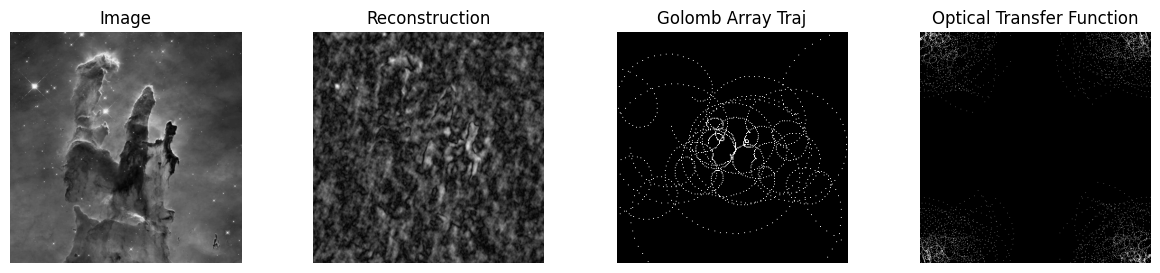

XZ


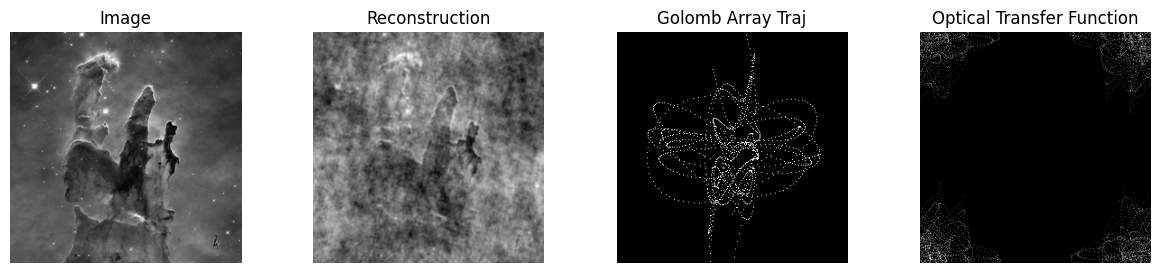

YZ


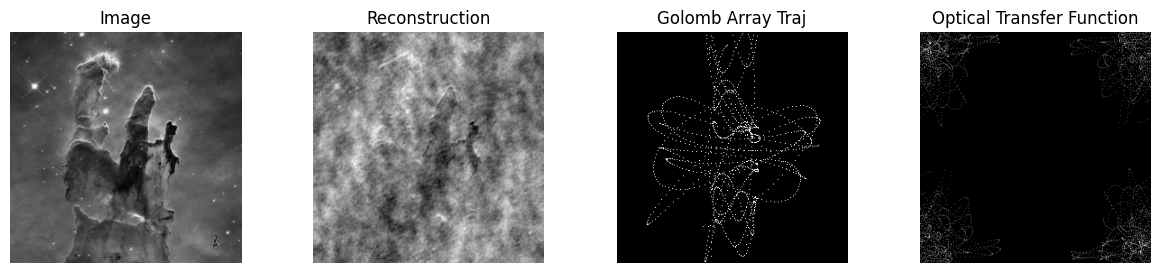

In [9]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

UDP.distance_limit_weight = 1/UDP.n_sat

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, limit_distance=2)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

In [10]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, limit_distance=3)[0],
    x0=x0,
    maxiter=500,
    popsize=100,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x)

differential_evolution step 1: f(x)= -0.02040816326530612
differential_evolution step 2: f(x)= -0.02040816326530612
differential_evolution step 3: f(x)= -0.02040816326530612
differential_evolution step 4: f(x)= -0.047619047619047616
differential_evolution step 5: f(x)= -0.047619047619047616
differential_evolution step 6: f(x)= -0.047619047619047616
differential_evolution step 7: f(x)= -0.047619047619047616
differential_evolution step 8: f(x)= -0.047619047619047616
differential_evolution step 9: f(x)= -0.047619047619047616
differential_evolution step 10: f(x)= -0.047619047619047616
differential_evolution step 11: f(x)= -0.047619047619047616
differential_evolution step 12: f(x)= -0.047619047619047616
differential_evolution step 13: f(x)= -0.047619047619047616
differential_evolution step 14: f(x)= -0.08390022675736962
differential_evolution step 15: f(x)= -0.08390022675736962
differential_evolution step 16: f(x)= -0.08843537414965986
differential_evolution step 17: f(x)= -0.08843537414965

KeyboardInterrupt: 

## PyGMO2

Doc: https://esa.github.io/pygmo2/overview.html

> reduced bounds

In [2]:
import pygmo as pg

### Differential Evolution


   Gen:        Fevals:          Best:            dx:            df:
      1            100    -0.00680272        15.1188     0.00680272
      3            300    -0.00680272         21.044     0.00680272
      5            500    -0.00680272         16.123     0.00680272
      7            700    -0.00680272        18.9208     0.00680272
      9            900    -0.00680272        17.7828     0.00680272
     11           1100     -0.0204082        21.1821      0.0204082
     13           1300     -0.0204082        20.2767      0.0204082
     15           1500     -0.0204082        19.2928      0.0204082
     17           1700     -0.0204082        17.2579      0.0204082
     19           1900     -0.0204082        18.2252      0.0204082
     21           2100     -0.0204082        21.1795      0.0204082
     23           2300     -0.0204082        18.3516      0.0204082
     25           2500     -0.0204082        19.1505      0.0204082
     27           2700     -0.0204082        20

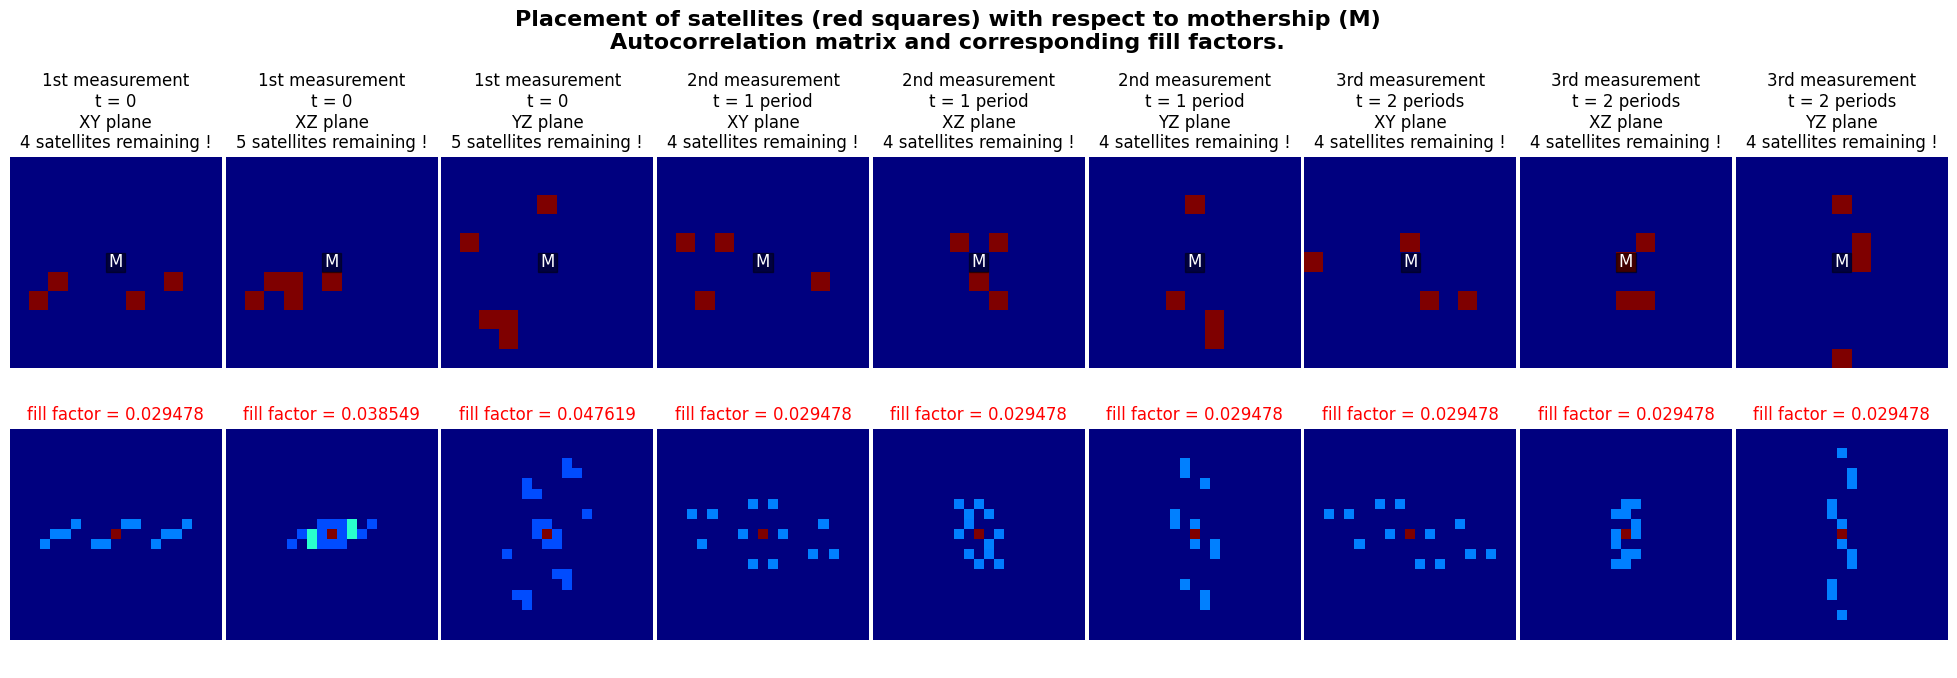

XY


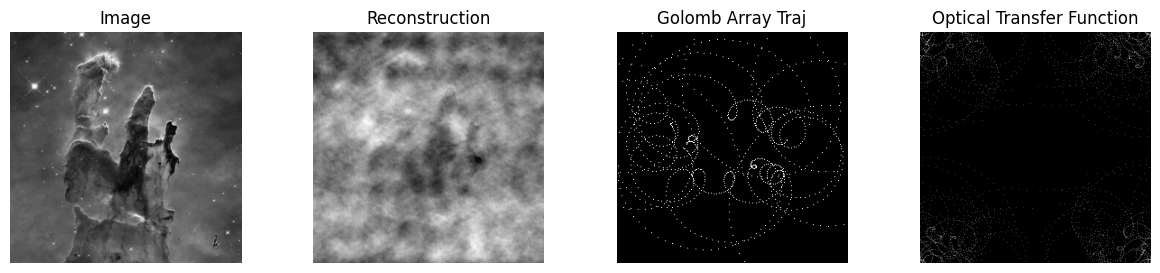

XZ


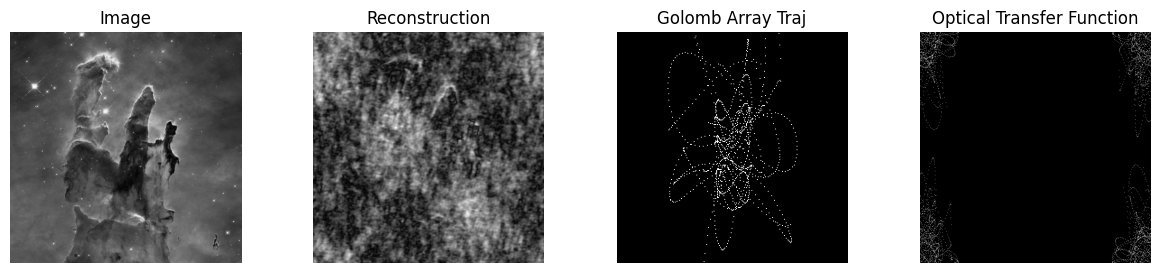

YZ


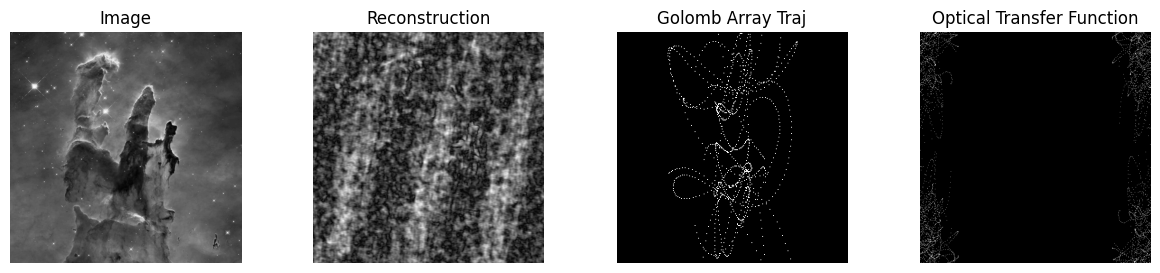

In [3]:
algo = pg.algorithm(
    pg.de(
        gen=500, 
        F=0.8, 
        CR=0.8, 
        variant=2, 
        ftol=0, 
        xtol=0
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=100)
elvo = algo.evolve(pop)

print_result(UDP,elvo.champion_x)
del algo, prob, pop, elvo

### Self-adaptive Differential Evolution


   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1            100    -0.00680272       0.768658      0.0666221        18.2945     0.00680272
      3            300    -0.00680272       0.407194       0.986729        19.2957     0.00680272
      5            500     -0.0204082       0.456554       0.839055        18.8966      0.0204082
      7            700     -0.0204082       0.456554       0.511627        19.4382      0.0204082
      9            900     -0.0204082       0.456554       0.689673        16.9529      0.0204082
     11           1100     -0.0204082       0.456554       0.689673        17.9442      0.0204082
     13           1300     -0.0204082       0.456554       0.689673        19.0556      0.0204082
     15           1500     -0.0204082       0.456554       0.689673        18.4866      0.0204082
     17           1700     -0.0204082       0.902649       0.951963        19.4295      0.0204082
     19           1

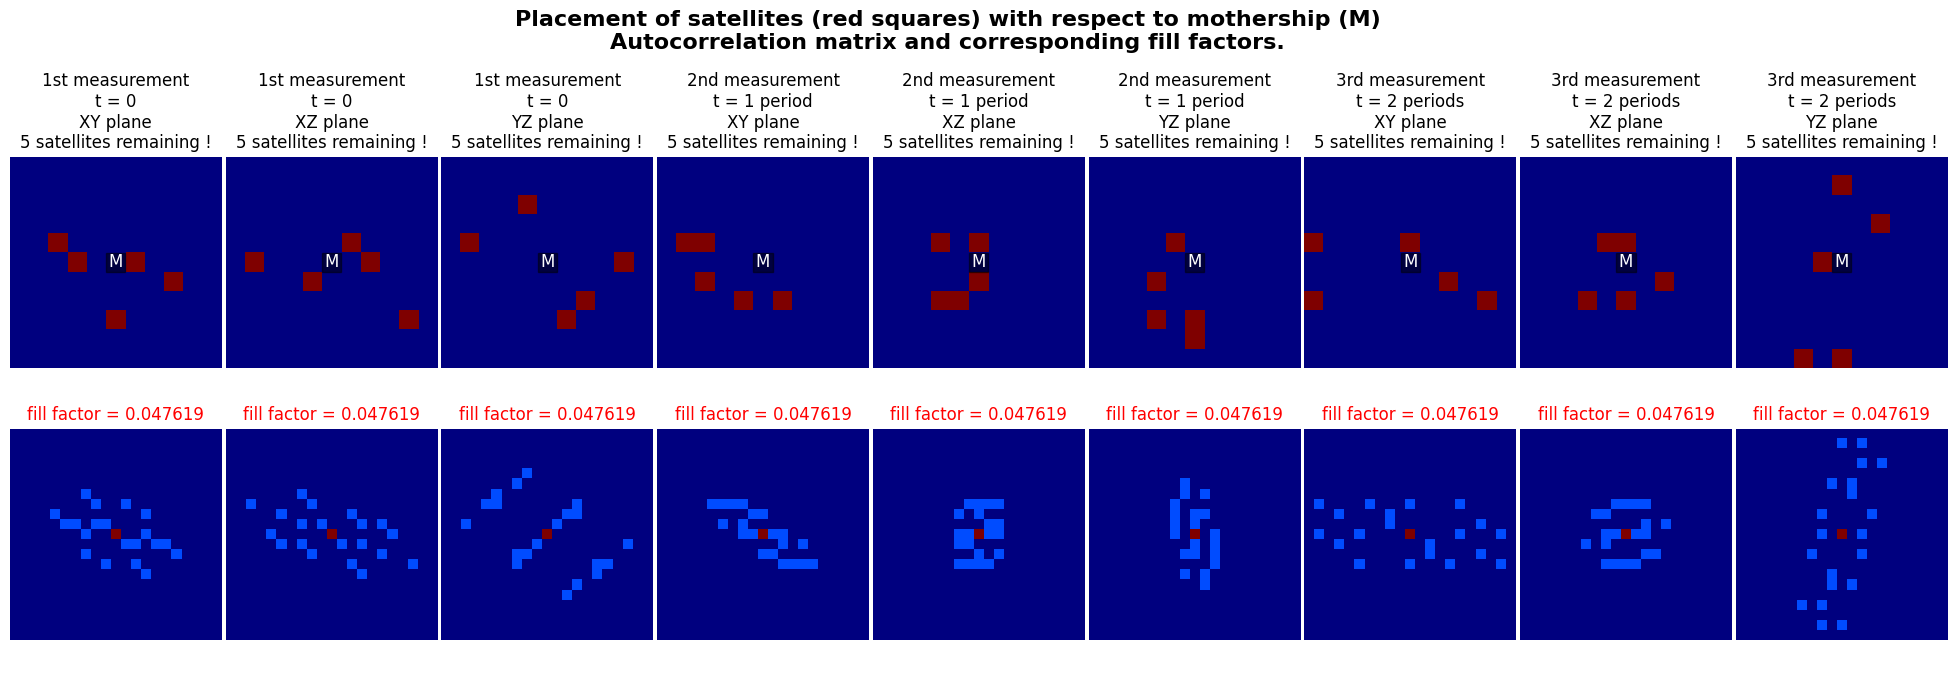

XY


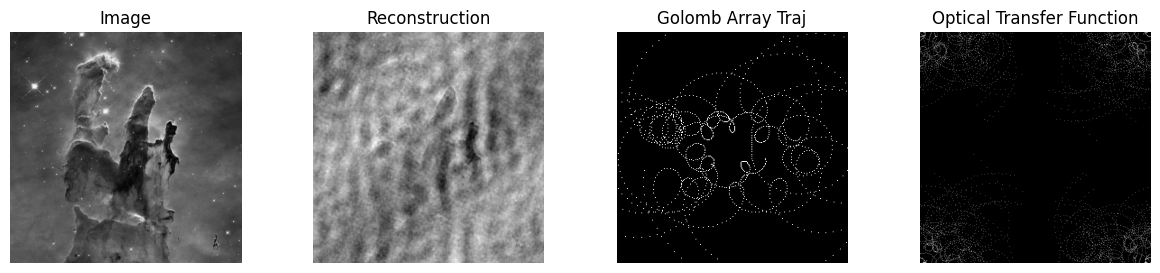

XZ


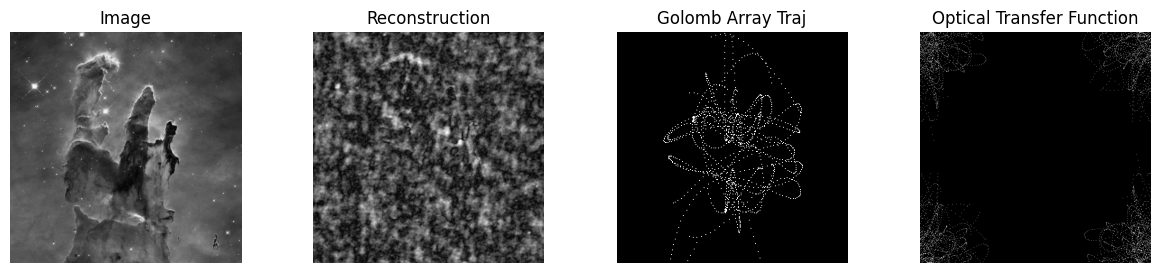

YZ


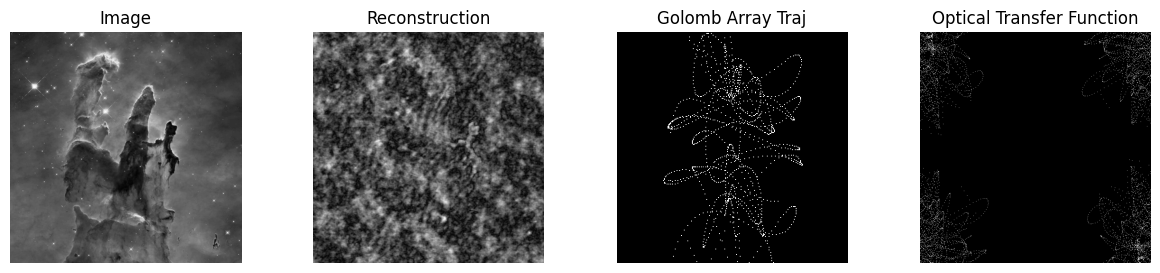

In [4]:
algo = pg.algorithm(
    pg.sade(
        gen=500, 
        variant=2, 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=False
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=100)
elvo = algo.evolve(pop) 

print_result(UDP,elvo.champion_x)
del algo, prob, pop, elvo

### Self-adaptive Differential Evolution in pygmo flavour (pDE)

The adaptation of the mutation variant is added to `pygmo.sade`


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            100    -0.00680272         0.9909        0.34342             10        17.7258     0.00680272
      3            300     -0.0204082       0.785607       0.580294             15        17.2369      0.0204082
      5            500     -0.0204082       0.785607       0.580294             15        19.0035      0.0204082
      7            700     -0.0204082       0.785607       0.580294             15        19.8383      0.0204082
      9            900     -0.0204082       0.609294       0.938589             10        13.3304      0.0204082
     11           1100     -0.0204082       0.822421       0.535388             15        17.7348      0.0204082
     13           1300     -0.0204082       0.141857       0.556416             10        21.8273      0.0204082
     15           1500     -0.0204082       0.822421       0.535388             15        20.40

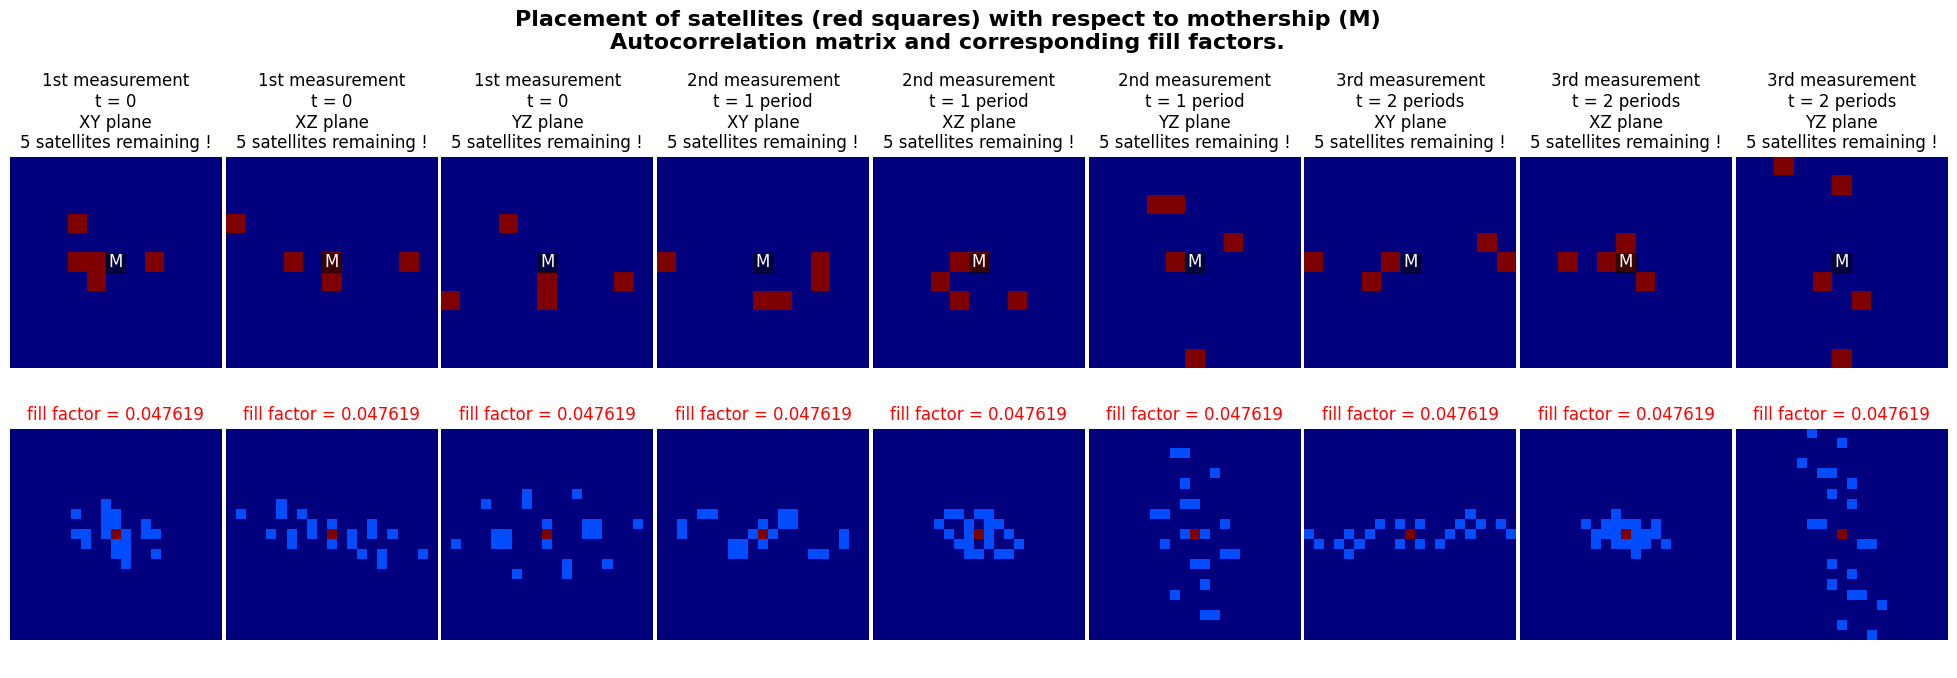

XY


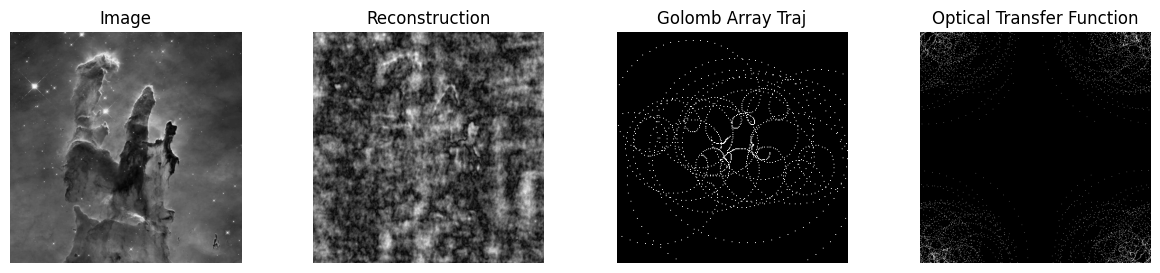

XZ


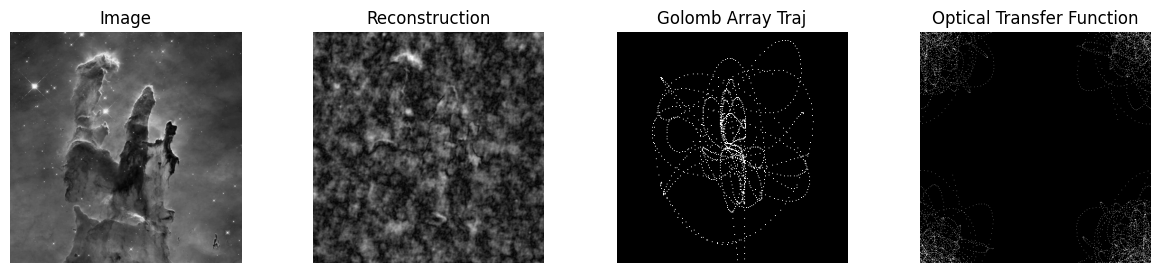

YZ


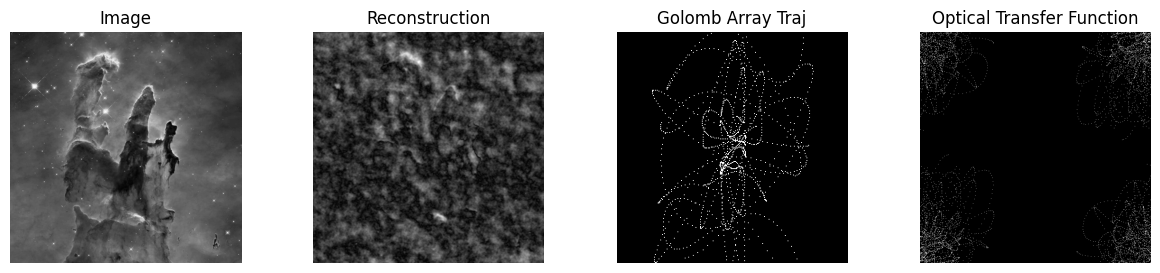

In [5]:
algo = pg.algorithm(
    pg.de1220(
        gen=500, 
        allowed_variants=[2, 3, 7, 10, 13, 14, 15, 16], 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=False
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=100)
elvo = algo.evolve(pop) 

print_result(UDP,elvo.champion_x)
del algo, prob, pop, elvo